In [1]:
# Imports
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
datasets = [train_data, test_data]
all_data = pd.concat(datasets)

In [3]:
def kmeans_chart(prop, size = 0):
    krange = range(1,size if size > 0 else train_data[prop].value_counts().size)
    inertias = []
    for i in krange:
        kmeans = KMeans(n_clusters=i, random_state=0).fit(train_data[prop].values.reshape(train_data[prop].size,1))
        inertias.append(kmeans.inertia_)

    plt.plot(krange, inertias)
    plt.title(prop)
    plt.xlabel('cluster')
    plt.ylabel('inertia')
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    
def scatter_chart(feature):
    survived = train_data[train_data['Survived']==1][feature]
    dead = train_data[train_data['Survived']==0][feature]
    y_survived = np.ones(survived.size)
    y_dead = np.zeros(dead.size)
    count_survived = survived.value_counts().to_dict()
    size_survived = survived.map(lambda x: count_survived[x]/survived.size*1000)
    count_dead = dead.value_counts().to_dict()
    size_dead = dead.map(lambda x: count_dead[x]/dead.size*1000)
    ax = plt.subplot(111)
#     ax.figure.figsize=[20, 20]
    ax.figure.set_figheight(20)
    ax.figure.set_figwidth(20)
#     ax.figure.colorbar()
    ax.scatter(y_survived, survived, marker='o', s=size_survived, alpha=0.3, cmap='viridis')
    ax.scatter(y_dead, dead, marker='o', c='r', s=size_dead, alpha=0.3)
    
#     plt.colorbar(ax.figure, ax=ax)
    ax.figure.show()

#     plt.scatter(y, survived, marker='o');

In [4]:
# see the missing values
all_data.isnull().sum() 

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [5]:
# get information from the name
all_names = all_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
all_names.value_counts()


Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Capt          1
Countess      1
Don           1
Lady          1
Dona          1
Sir           1
Mme           1
Jonkheer      1
Name: Name, dtype: int64

In [6]:
names = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train_data['Title'] = names

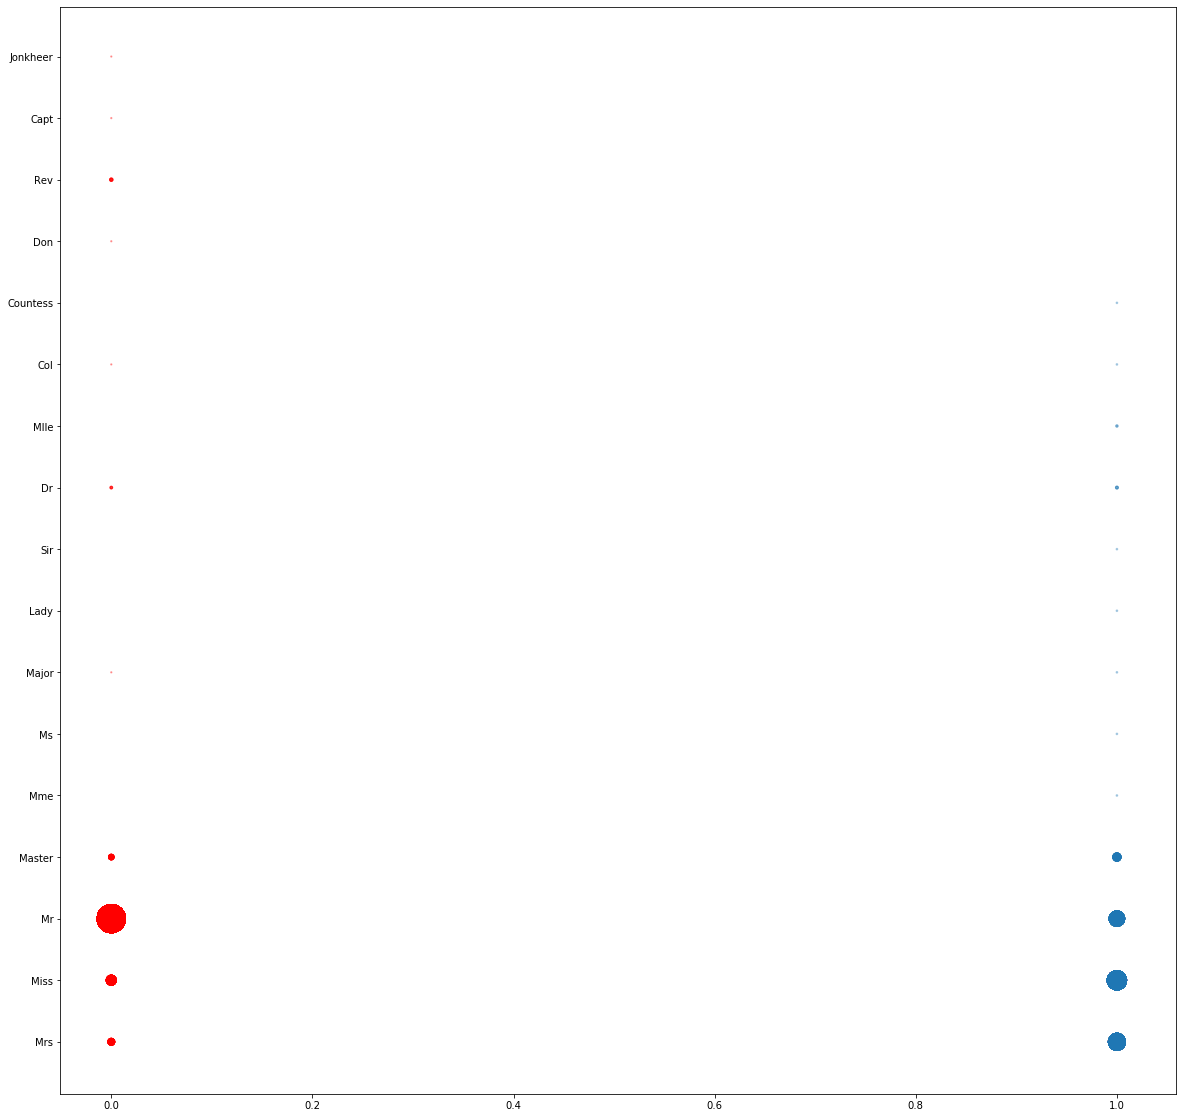

In [7]:
train_data.groupby('Survived')['Title'].value_counts()
scatter_chart('Title')

In [8]:
# Title
# title_mapping = { "Mr": 1, "Miss": 0.2, "Mrs": 0.6, "Master": 0.8, "Dr": 0.4, "Rev": 0.4, 
#                  "Mlle": 0.4, "Major": 0.4, "Col": 0.4, "Mme": 0.4, "Jonkheer": 0.4, "Countess": 0.4, 
#                  "Don": 0.4, "Lady": 0.4, "Capt": 0.4, "Ms": 0.4, "Sir": 0.4, "Dona": 0.6}

# title_mapping = { "Mr": 0.1,                 
#                  "Major": 0.4, "Col": 0.4, "Jonkheer": 0.4,  
#                  "Don": 0.4,  "Capt": 0.4, "Ms": 0.4, "Sir": 0.4,  "Rev": 0.4, 
#                  "Dr": 0.6, "Master": 0.6,
#                  "Mrs": 0.8,
#                  "Miss": 1, "Mlle": 1, "Mme": 1, "Dona": 1, "Lady": 1, "Countess": 1          
#                   }
title_mapping = { "Mr": 1,                 
                 "Major": 2, "Col": 3, "Jonkheer": 4,  
                 "Don": 5,  "Capt": 6, "Ms": 7, "Sir": 8,  "Rev": 9, 
                 "Dr": 10, "Master": 11,
                 "Mrs": 12,
                 "Miss": 13, "Mlle": 14, "Mme": 15, "Dona": 16, "Lady": 17, "Countess": 18          
                  }

train_data['Title'] = names.map(title_mapping)

title_scaller = MinMaxScaler()
train_data['Title'] = title_scaller.fit_transform(train_data['Title'].values.reshape(-1,1), train_data['Survived'])



In [9]:
train_data.groupby('Survived')['Title'].value_counts()

Survived  Title   
0         0.000000    436
          0.705882     55
          0.647059     26
          0.588235     17
          0.470588      6
          0.529412      4
          0.058824      1
          0.117647      1
          0.176471      1
          0.235294      1
          0.294118      1
1         0.705882    127
          0.647059     99
          0.000000     81
          0.588235     23
          0.529412      3
          0.764706      2
          0.058824      1
          0.117647      1
          0.352941      1
          0.411765      1
          0.823529      1
          0.941176      1
          1.000000      1
Name: Title, dtype: int64

In [10]:
train_data.drop(columns=['Name'], inplace=True)

In [11]:
# Sex
sex_mapping = { "male": 0, "female": 1}
train_data['Sex'] = train_data.Sex.map(sex_mapping)

In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.000000
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0.647059
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.705882
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,0.647059
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.000000


In [13]:
train_data.dropna().groupby('Survived')['Embarked'].value_counts()

Survived  Embarked
0         S           42
          C           17
          Q            1
1         S           74
          C           48
          Q            1
Name: Embarked, dtype: int64

In [14]:
# Lets see the missing data
train_data[pd.isnull(train_data['Embarked'])]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,1,38.0,0,0,113572,80.0,B28,NaN,0.705882
829,830,1,1,1,62.0,0,0,113572,80.0,B28,NaN,0.647059


In [15]:
train_data['Embarked'].fillna('C', inplace=True)

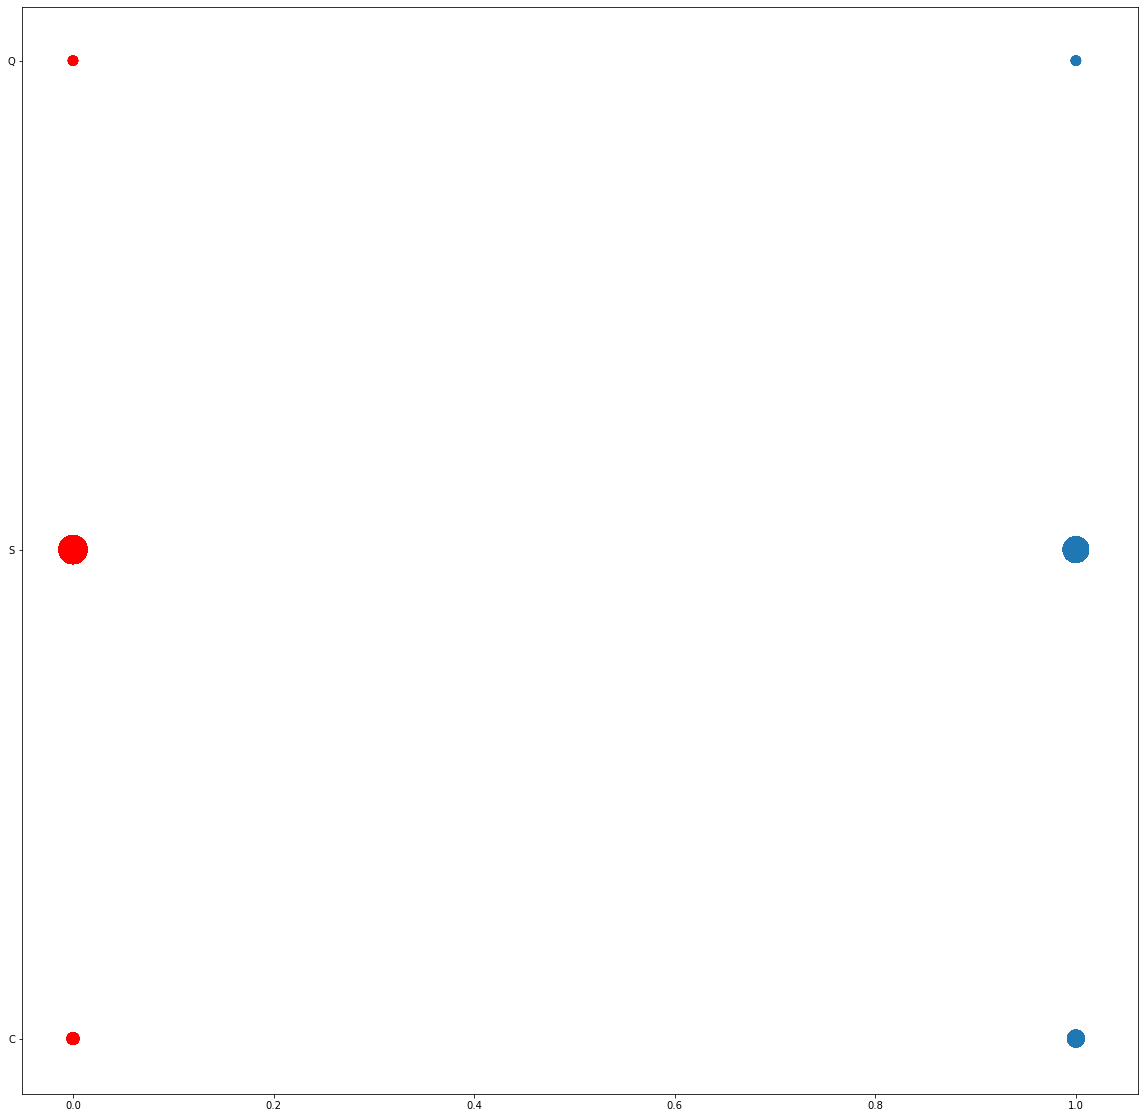

In [16]:
scatter_chart('Embarked')

In [17]:
# Embarked
# embarked_mapping = { "S": 0.7, "C": 1, "Q": 0.3 }
embarked_mapping = { "S": 1, "C": 2, "Q": 3 }

train_data['Embarked'] = train_data.Embarked.map(embarked_mapping)

embarked_scaller = MinMaxScaler()
train_data['Embarked'] = embarked_scaller.fit_transform(train_data['Embarked'].values.reshape(-1,1), train_data['Survived'])



In [18]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.000000
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,0.5,0.647059
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.705882
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0.0,0.647059
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0.0,0.000000


In [19]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [20]:
# get all the missing ages
age_test = train_data[pd.isnull(train_data['Age'])]
age_test.head(19)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,1.0,0.000000
17,18,1,2,0,NaN,0,0,244373,13.0000,NaN,0.0,0.000000
19,20,1,3,1,NaN,0,0,2649,7.2250,NaN,0.5,0.647059
26,27,0,3,0,NaN,0,0,2631,7.2250,NaN,0.5,0.000000
28,29,1,3,1,NaN,0,0,330959,7.8792,NaN,1.0,0.705882
29,30,0,3,0,NaN,0,0,349216,7.8958,NaN,0.0,0.000000
31,32,1,1,1,NaN,1,0,PC 17569,146.5208,B78,0.5,0.647059
32,33,1,3,1,NaN,0,0,335677,7.7500,NaN,1.0,0.705882
36,37,1,3,0,NaN,0,0,2677,7.2292,NaN,0.5,0.000000
42,43,0,3,0,NaN,0,0,349253,7.8958,NaN,0.5,0.000000


In [21]:
means = train_data.groupby('Title')['Age'].mean().to_dict()
median = train_data['Age'].mean()
def median_age(row):
    if(np.isnan(row['Age'])):
#         row['Age'] = means[row['Title']]
        row['Age'] = median
    return row


# asd = age_test.fillna(train_data.groupby('Title')['Age'].mean().to_dict(), axis='Title')

train_data = train_data.apply(median_age, axis=1)

train_data.head()
# asd.head()
# train_data.groupby('Title')['Age'].mean().to_dict()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.000000
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,0.5,0.647059
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.705882
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0.0,0.647059
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0.0,0.000000


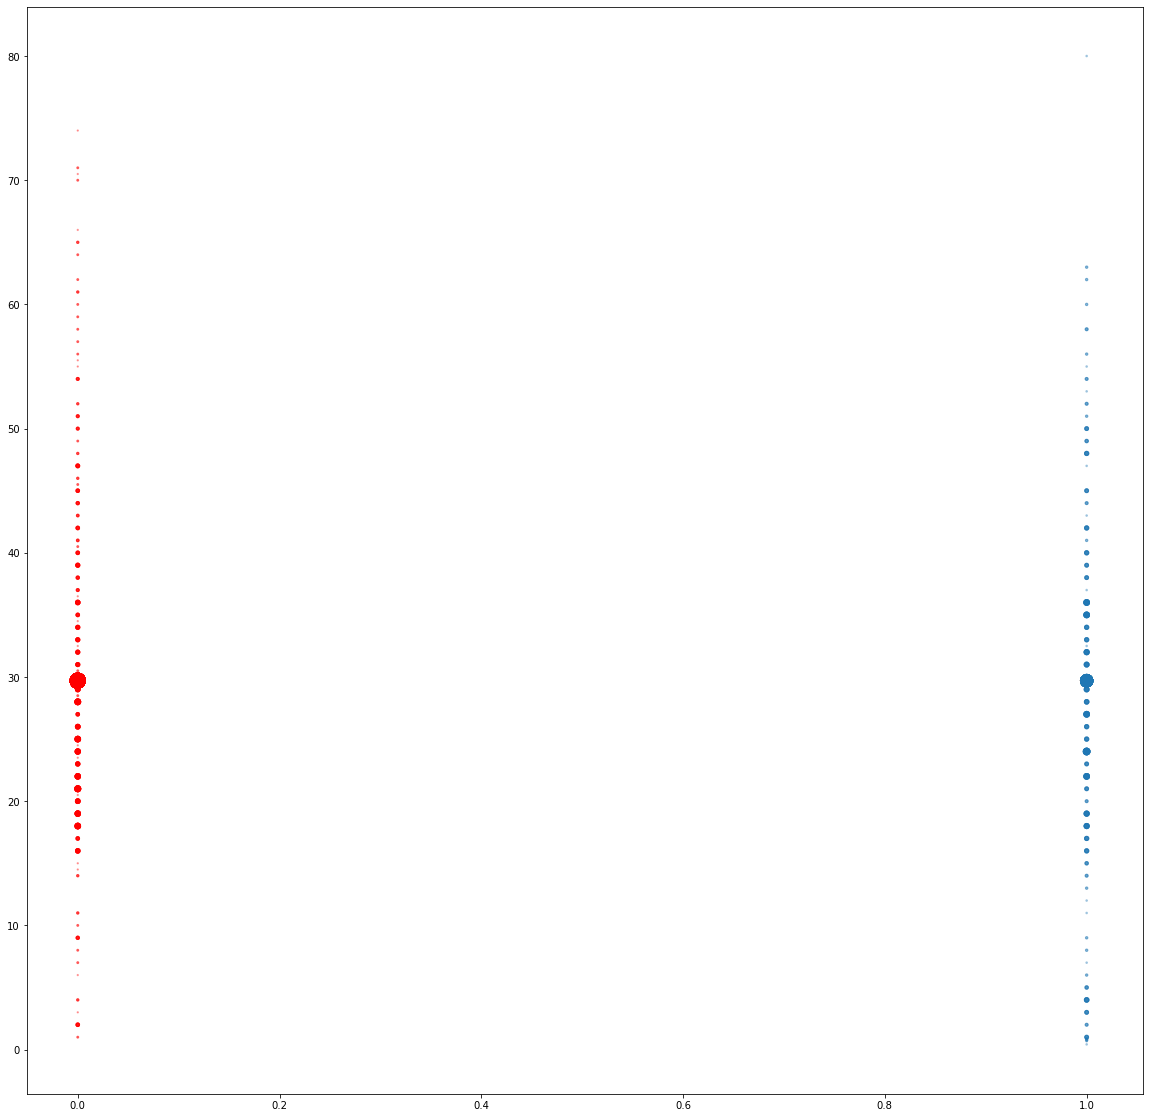

In [22]:
scatter_chart('Age')

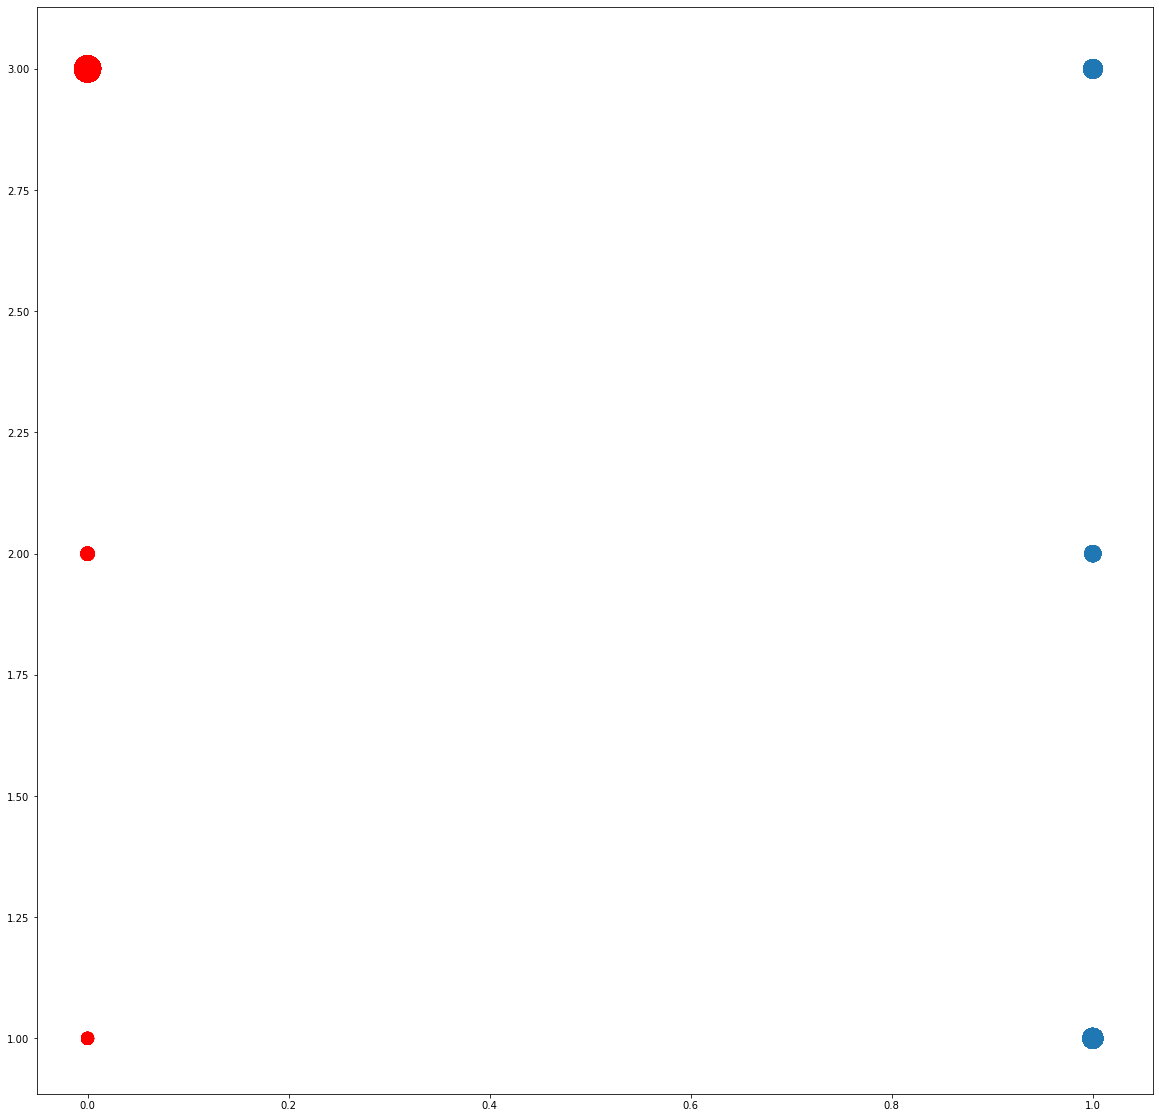

In [23]:
scatter_chart('Pclass')
train_data.groupby('Survived')['Pclass'].value_counts()

# pclass_mapping = { 1: 1, 2: 0.7, 3: 0.4 }
# train_data['Pclass'] = train_data['Pclass'].map(pclass_mapping)

pclass_scaller = StandardScaler()
train_data['Pclass'] = pclass_scaller.fit_transform(train_data['Pclass'].values.reshape(-1,1), train_data['Survived'])


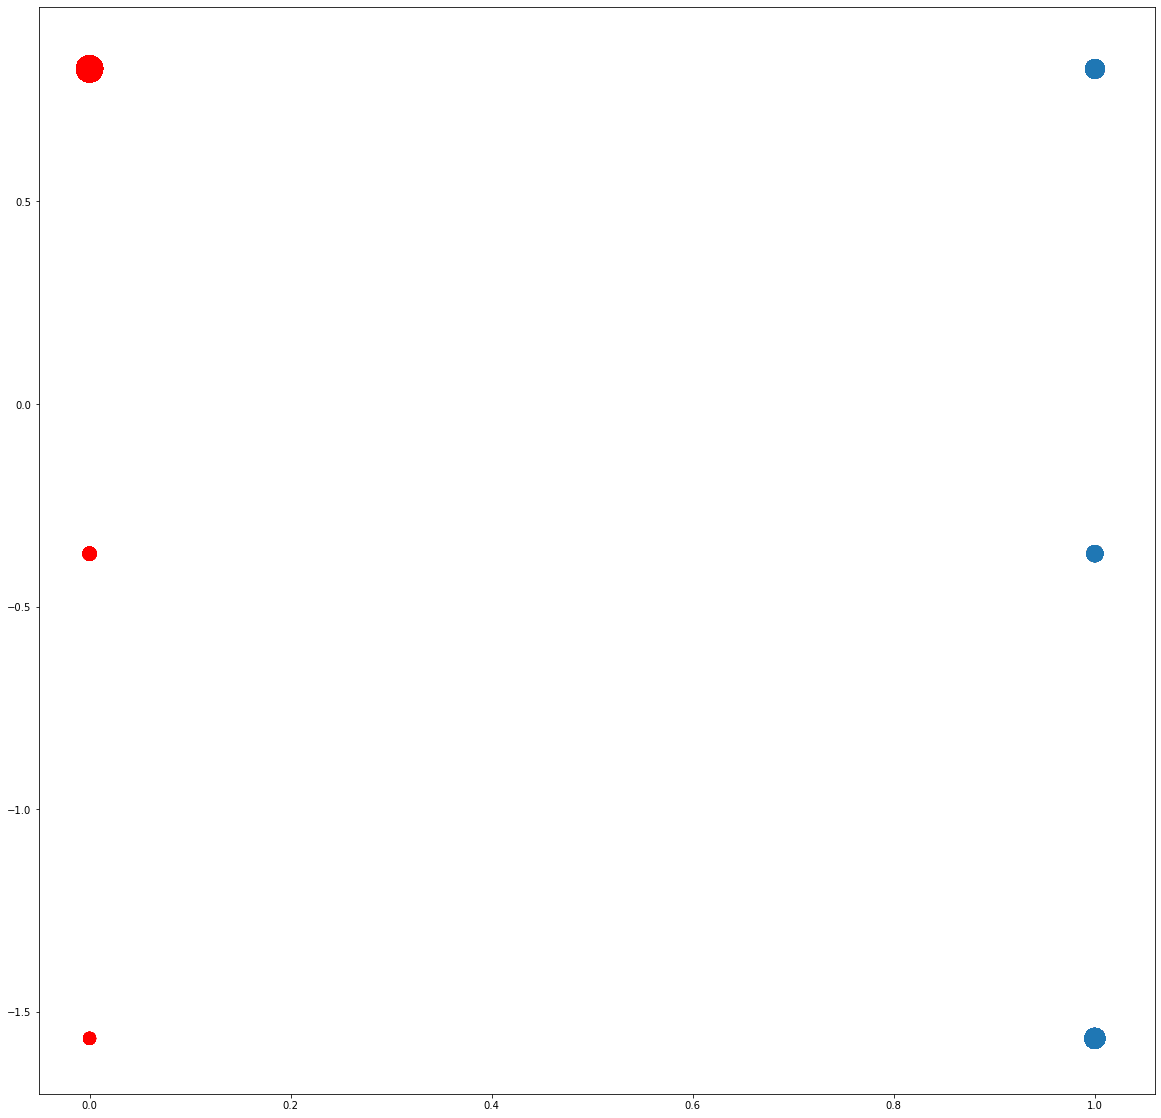

In [24]:
scatter_chart('Pclass')

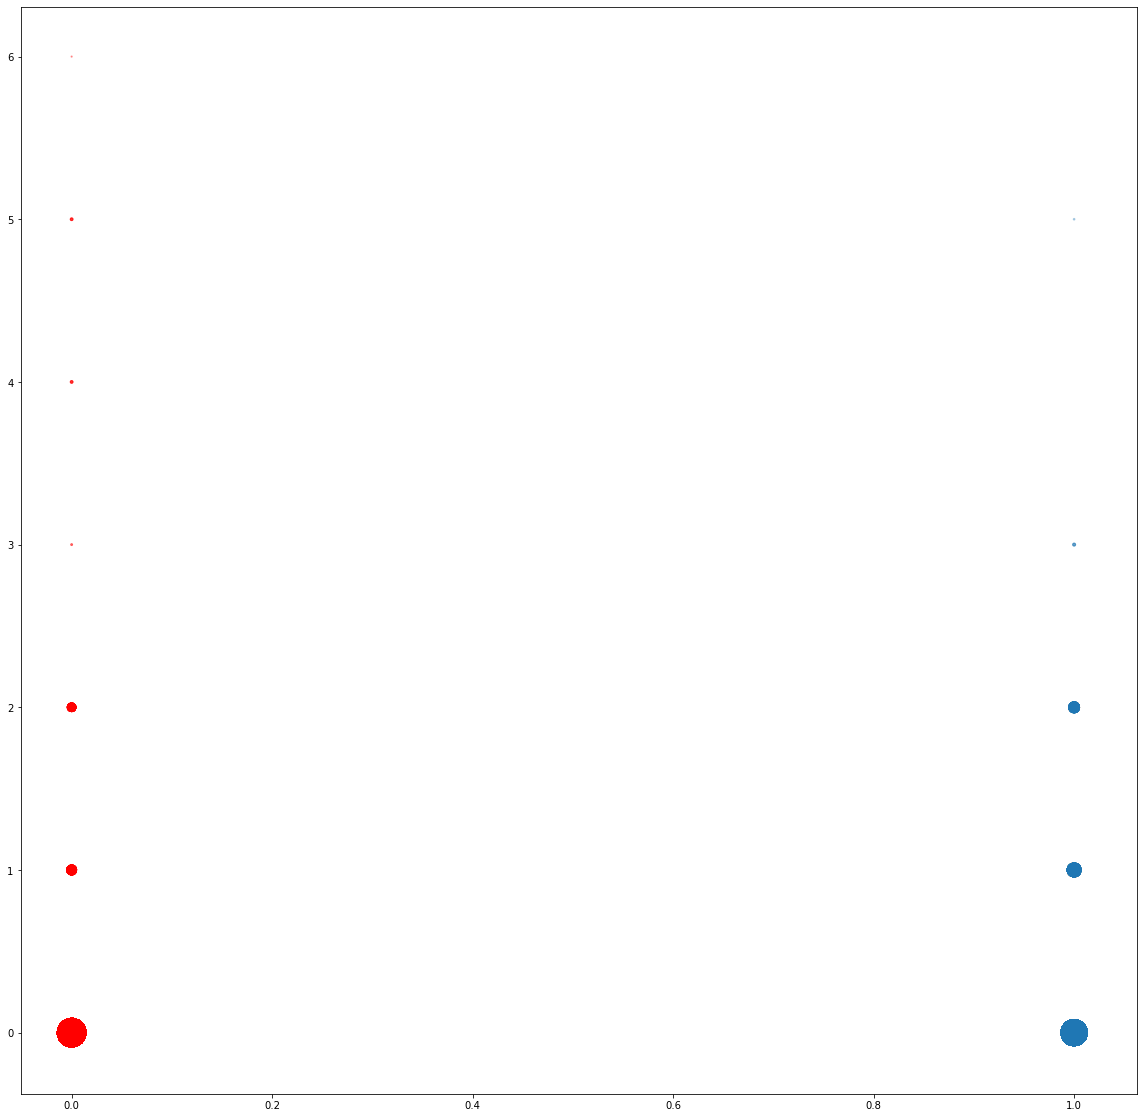

In [25]:
scatter_chart('Parch')
train_data.groupby('Survived')['Parch'].value_counts()

# pclass_mapping = { 1: 1, 2: 0.7, 3: 0.4 }
# train_data['Pclass'] = train_data['Pclass'].map(pclass_mapping)

parch_scaller = StandardScaler()
train_data['Parch'] = parch_scaller.fit_transform(train_data['Parch'].values.reshape(-1,1), train_data['Survived'])


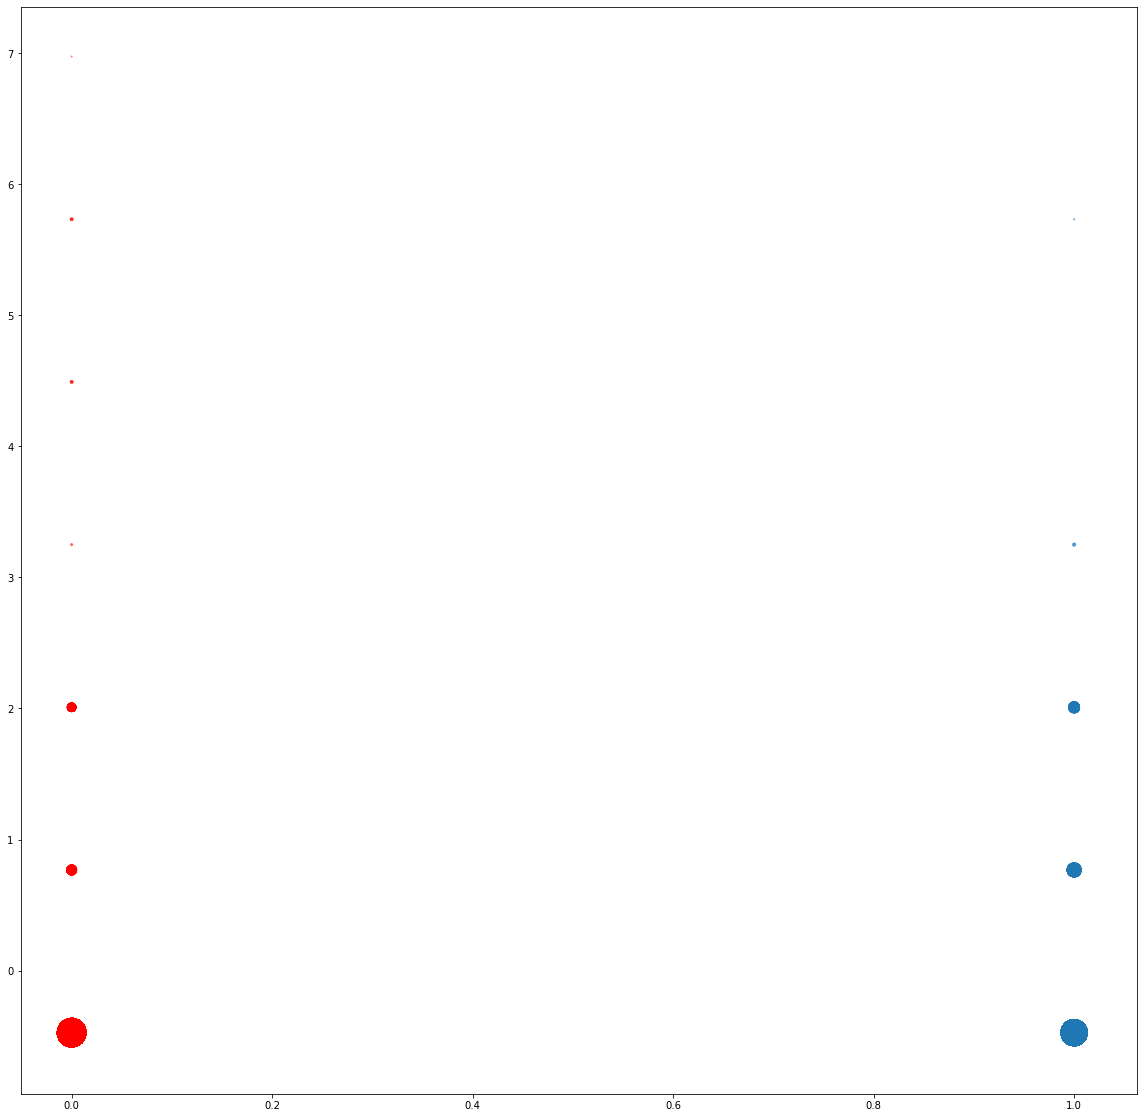

In [26]:
scatter_chart('Parch')

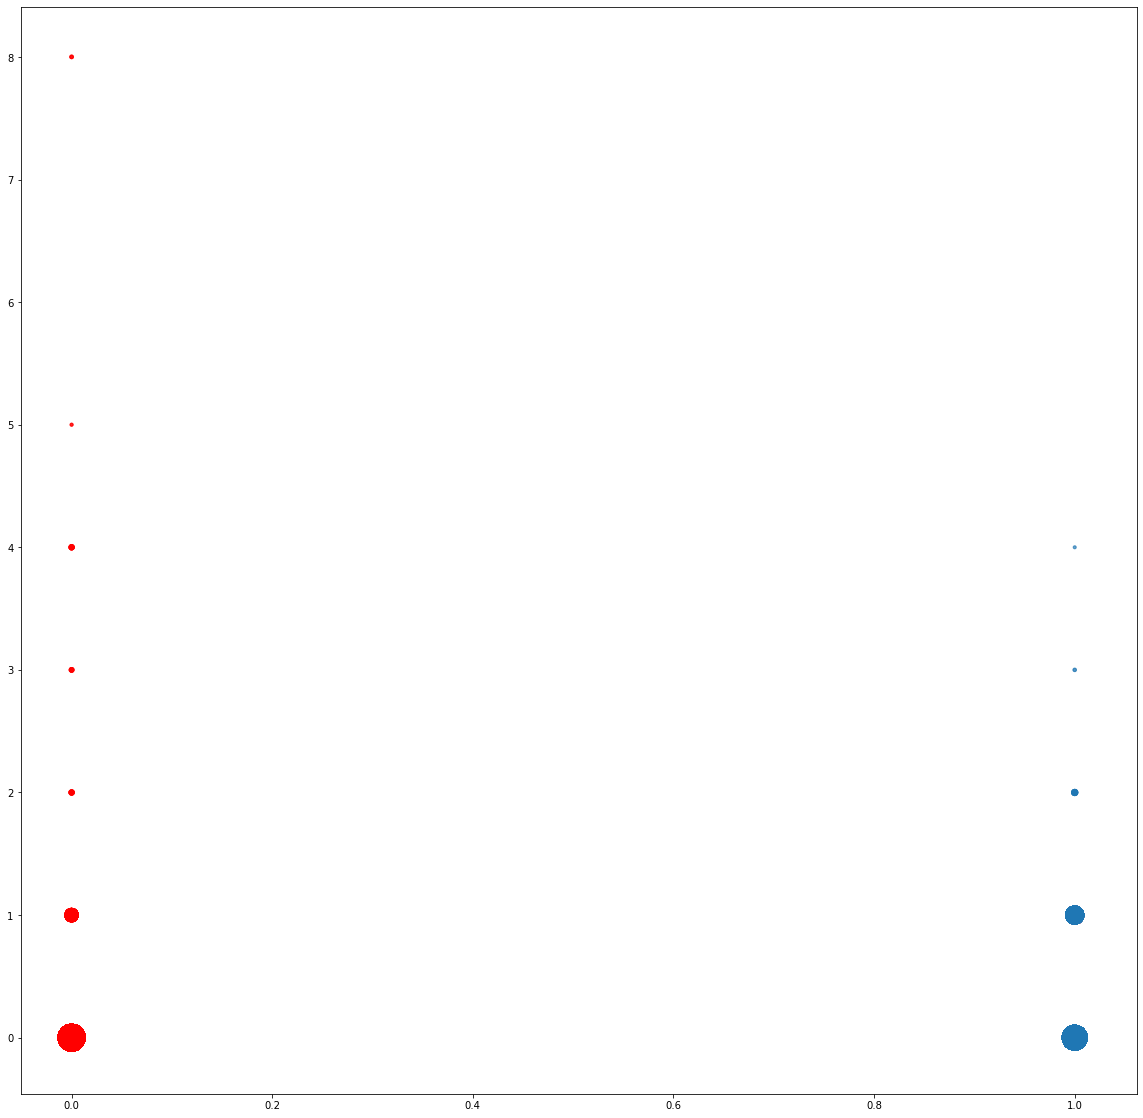

In [27]:
scatter_chart('SibSp')

In [28]:
train_data.groupby('Survived')['SibSp'].value_counts()

Survived  SibSp
0         0        398
          1         97
          2         15
          4         15
          3         12
          8          7
          5          5
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: SibSp, dtype: int64

In [29]:
# sibsp_mapping = {
#     5: 0.2, 6: 0.2, 7:0.2, 8: 0.2,
#     4: 0.6, 3: 0.6,
#     0: 0.5,
#     2: 0.7,
#     1: 0.9
# }
# sibsp_mapping = {
#     5: 0.1, 6: 0.1, 7:0.1, 8: 0.1,
#     4: 0.2, 3: 0.2,
#     0: 0.4,
#     1: 0.6,
#     2: 0.7,
# }
# train_data['SibSp'] = train_data['SibSp'].map(sibsp_mapping)

sibsp_scaller = StandardScaler()
# fare_scaller.fit_transform(train_data['Fare'], train_data['Survived'])
# fares = train_data['Fare'].values.reshape(-1,1);
train_data['SibSp'] = sibsp_scaller.fit_transform(train_data['SibSp'].values.reshape(-1,1), train_data['Survived'])

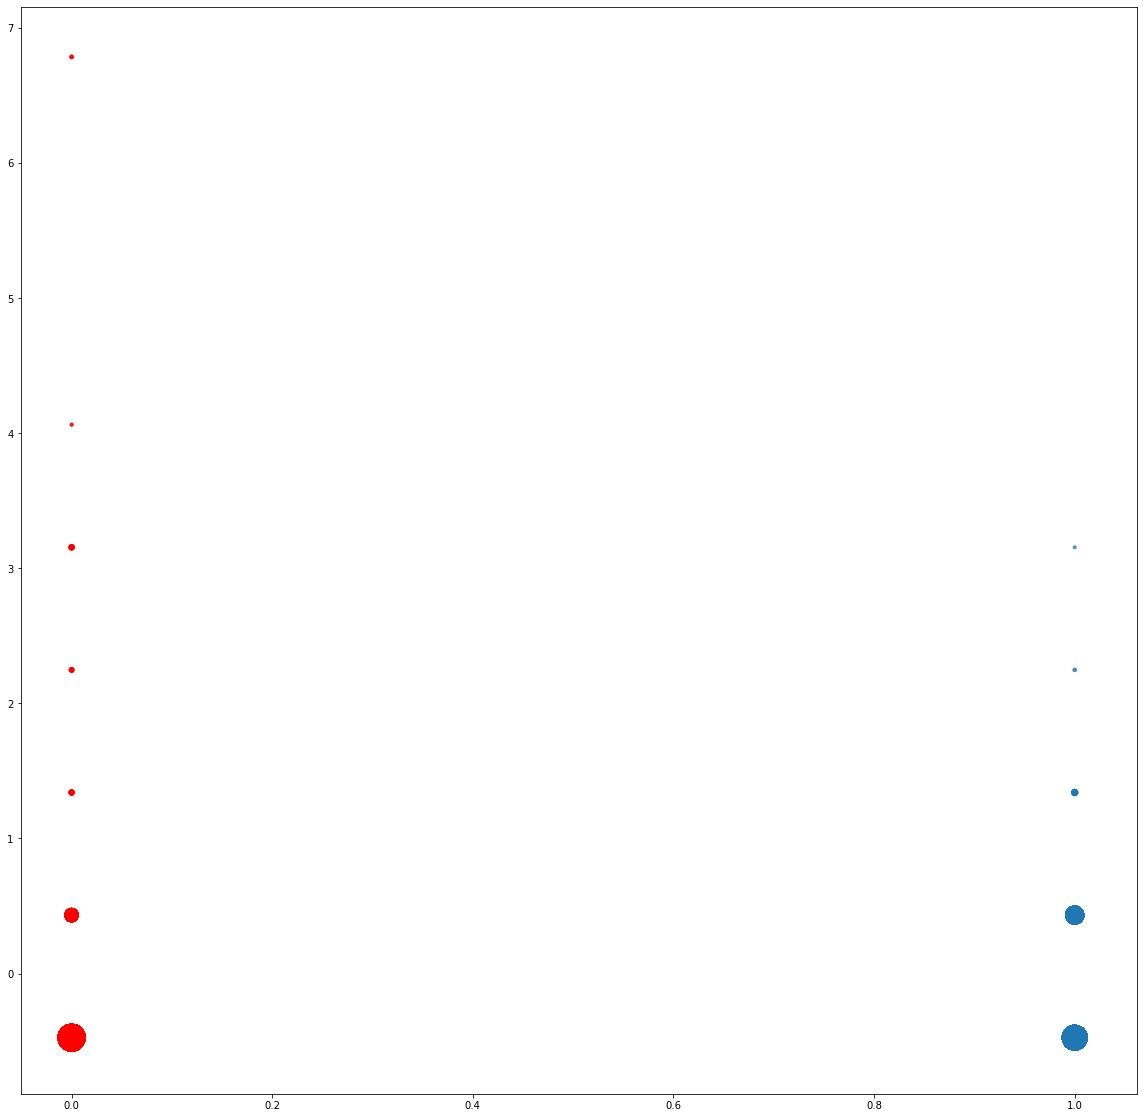

In [30]:
scatter_chart('SibSp')

In [31]:
# median = train_data['Age'].median()
# std = train_data['Age'].std()
outliers = train_data[train_data['Age'] > 65]
def age_outliers(row):
    if(row['Age'] > 65):
        row['Age'] = 65
    return row
train_data = train_data.apply(age_outliers, axis=1)
# outliers.head(20)
# train_data.loc[outliers, 'Age'] = np.nan
# train_data['Age'].fillna(train_data['Age'].nlargest(8).values[-1], inplace=True)

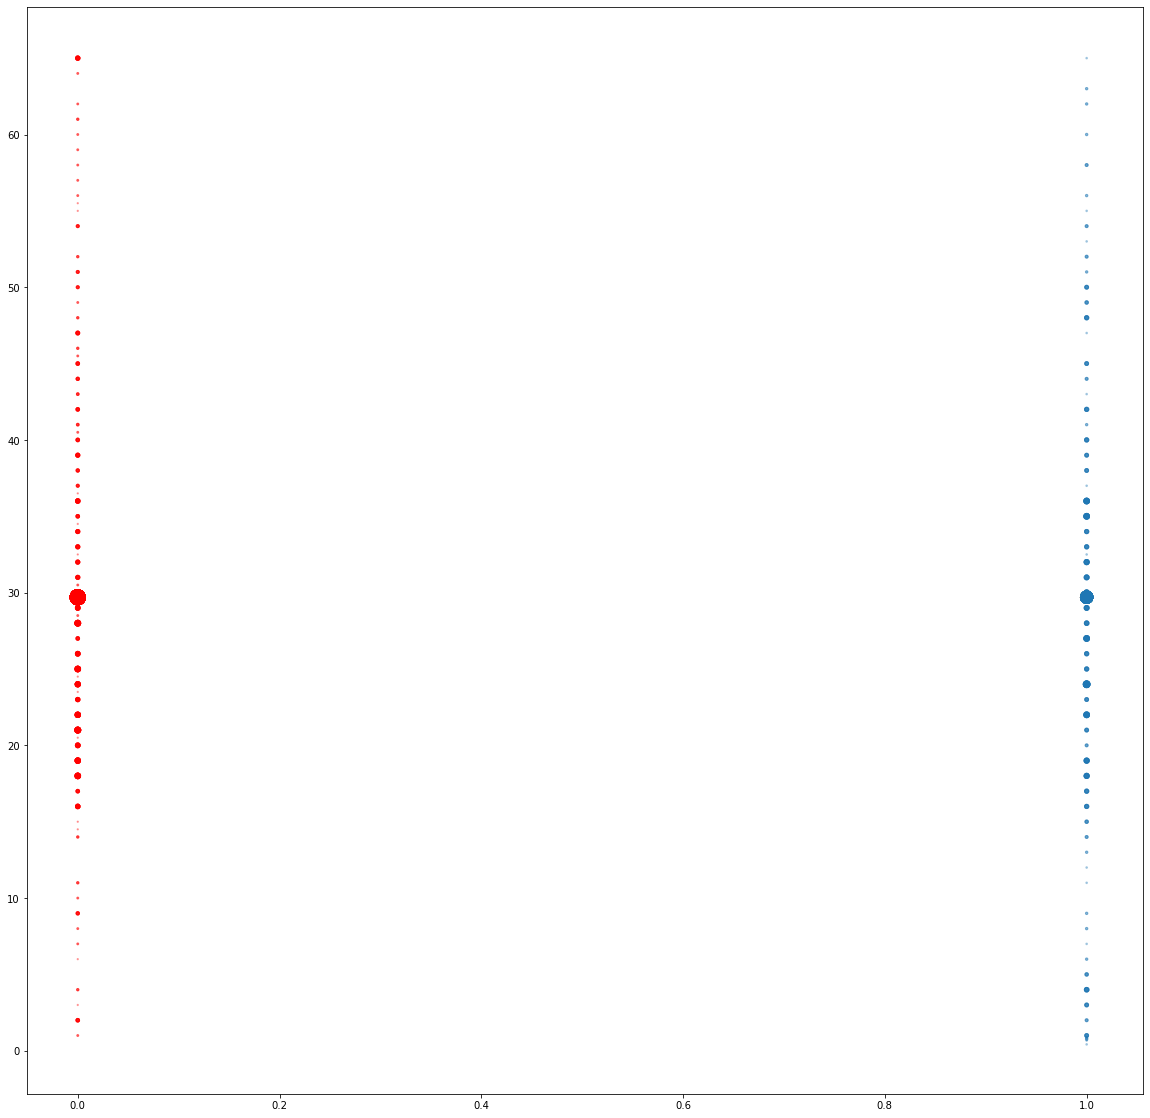

In [32]:
scatter_chart('Age')

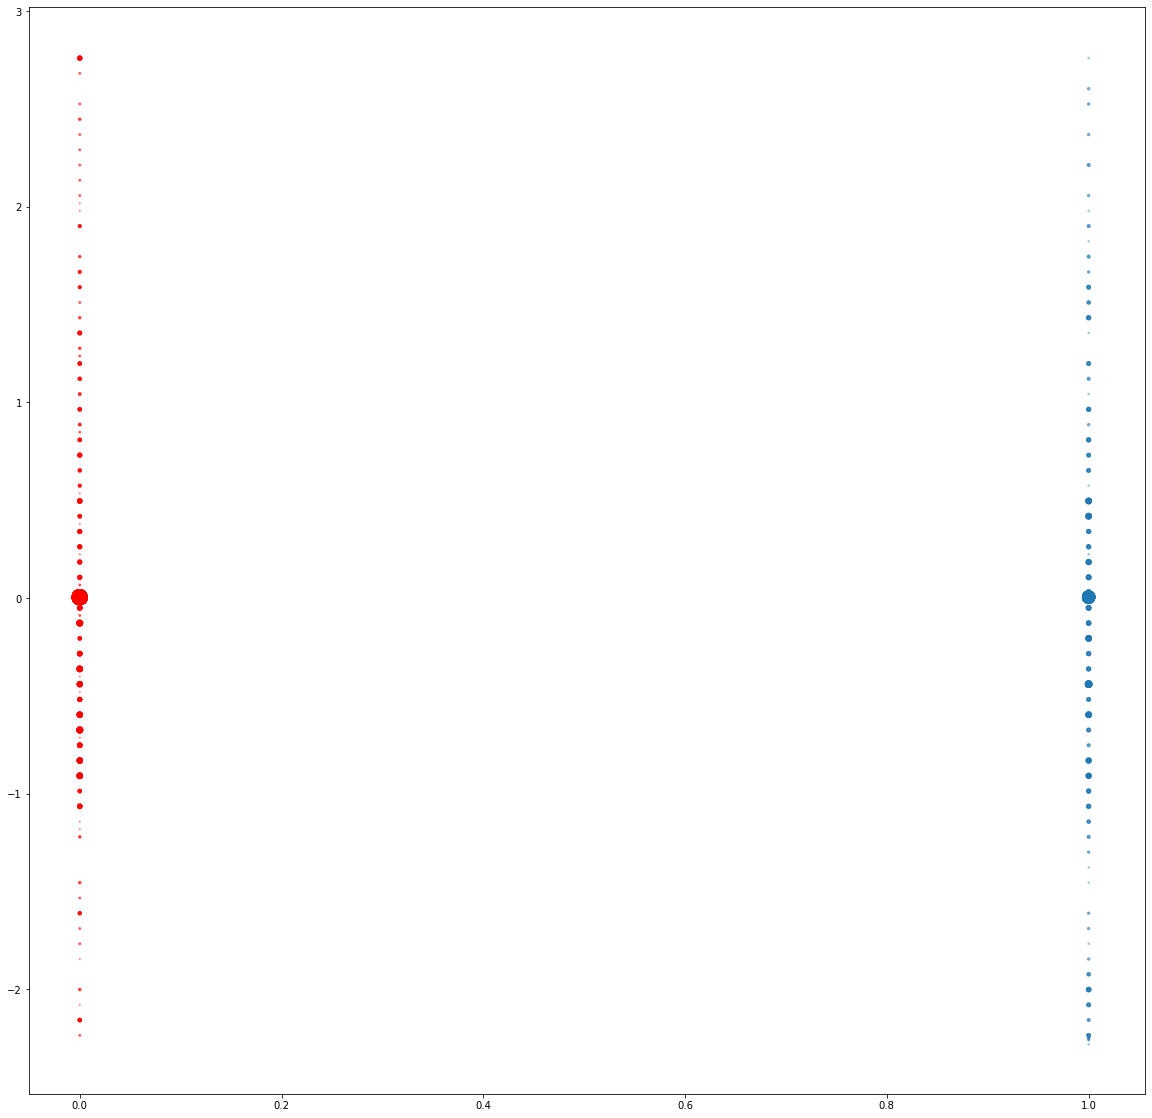

In [33]:
age_scaller = StandardScaler()
train_data['Age'] = age_scaller.fit_transform(train_data['Age'].values.reshape(-1,1), train_data['Survived'])
scatter_chart('Age')

In [34]:
def fare_outliers(row):
    distance = 1.5 * (np.percentile(train_data['Fare'], 75) - np.percentile(train_data['Fare'], 25))
    if(row['Fare'] > distance + np.percentile(train_data['Fare'], 75)):
        row['Fare'] = distance + np.percentile(train_data['Fare'], 75)
    elif(row['Fare'] < np.percentile(train_data['Fare'], 25) - distance):
        row['Fare'] = 65
    return row

train_data = train_data.apply(fare_outliers, axis=1)

fare_scaller = StandardScaler()
# fare_scaller = MinMaxScaler()
# fare_scaller.fit_transform(train_data['Fare'], train_data['Survived'])
# fares = train_data['Fare'].values.reshape(-1,1);
train_data['Fare'] = fare_scaller.fit_transform(train_data['Fare'].values.reshape(-1,1), train_data['Survived'])

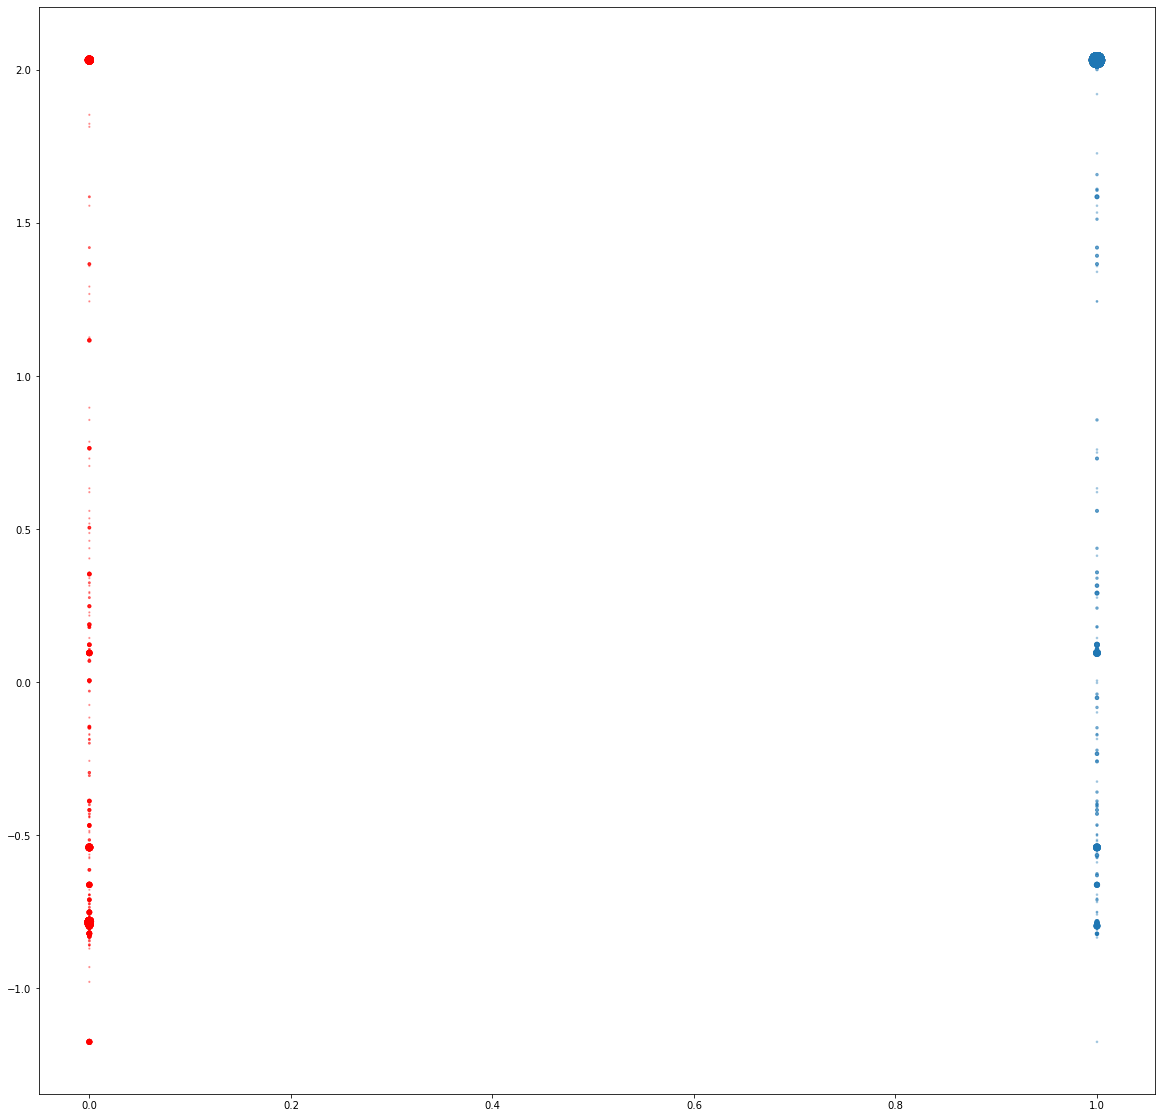

In [35]:
scatter_chart('Fare')

In [36]:
train_data['Fare']

0     -0.820552
1      2.031623
2     -0.787578
3      1.419297
4     -0.781471
         ...   
886   -0.539655
887    0.290823
888   -0.029155
889    0.290823
890   -0.796127
Name: Fare, Length: 891, dtype: float64

In [37]:
y = train_data['Survived']

In [38]:
# for now drop the remainings rows
train_data.drop(columns=['Cabin', 'Ticket', 'PassengerId', 'Survived'], inplace=True)

In [39]:
train_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [40]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
X = scaler.fit_transform(train_data, y)
# X = train_data
k_fold = KFold(n_splits=8, shuffle=True, random_state=0)

In [41]:
models = {}
def create_model(name, model):
    scoring='accuracy'
    scores = cross_val_score(model, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
    model.fit(X,y)
    print("[%s] Accuracy: %0.2f (+/- %0.2f)" % (name, scores.mean(), scores.std() * 2))
    return model

In [42]:
models['SVM'] = create_model('SVM', svm.SVC())

[SVM] Accuracy: 0.82 (+/- 0.04)


In [43]:
models['Gaussian'] = create_model('Gaussian', GaussianNB())

[Gaussian] Accuracy: 0.80 (+/- 0.06)


In [44]:
models['LogisticRegression'] = create_model('LogisticRegression', LogisticRegression(max_iter=300))

[LogisticRegression] Accuracy: 0.81 (+/- 0.05)


In [45]:
models['KNN'] = create_model('KNN', KNeighborsClassifier(n_neighbors=7))

[KNN] Accuracy: 0.81 (+/- 0.04)


In [46]:
raw_test_data = test_data.copy()
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [47]:

# Fare nulls
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
test_data = test_data.apply(fare_outliers, axis=1)
test_data['Fare'] = fare_scaller.transform(test_data['Fare'].values.reshape(-1,1))
# Title
test_names = test_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_names.map(title_mapping)
test_data['Title'] = title_scaller.transform(test_data['Title'].values.reshape(-1,1))

# Embarked
test_data['Embarked'] = test_data.Embarked.map(embarked_mapping)
test_data['Embarked'] = embarked_scaller.transform(test_data['Embarked'].values.reshape(-1,1))

# Age
test_data = test_data.apply(median_age, axis=1)
test_data = test_data.apply(age_outliers, axis=1)
test_data['Age'] = age_scaller.transform(test_data['Age'].values.reshape(-1,1))

# Sex
test_data['Sex'] = test_data.Sex.map(sex_mapping)

# SibSp
# test_data['SibSp'] = test_data['SibSp'].map(sibsp_mapping)
test_data['SibSp'] = sibsp_scaller.transform(test_data['SibSp'].values.reshape(-1,1))

# Pclass
# test_data['Pclass'] = test_data['Pclass'].map(pclass_mapping)
test_data['Pclass'] = pclass_scaller.transform(test_data['Pclass'].values.reshape(-1,1))

# Parch
test_data['Parch'] = parch_scaller.transform(test_data['Parch'].values.reshape(-1,1))

test_data.drop(columns=['Name', 'Cabin', 'Ticket', 'PassengerId'], inplace=True)

In [48]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [49]:
test_names.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Name, dtype: int64

In [50]:
test_data['Title']

0      0.000000
1      0.647059
2      0.000000
3      0.000000
4      0.647059
         ...   
413    0.000000
414    0.882353
415    0.000000
416    0.000000
417    0.588235
Name: Title, Length: 418, dtype: float64

In [51]:
inputs = scaler.transform(test_data)
# inputs = test_data
prediction = models['LogisticRegression'].predict(inputs)

In [52]:
submission = pd.DataFrame({
        "PassengerId": raw_test_data["PassengerId"],
        "Survived": prediction
    })

filename = 'std-log.csv'
submission.to_csv('predictions/'+filename, index=False)

In [53]:
new_file = 'predictions/'+filename
best_file = 'predictions/all-std-svm.csv'

df1 = pd.read_csv(new_file)
df2 = pd.read_csv(best_file)



result = pd.DataFrame(columns=['PassengerId'])
df1['isEqual'] = np.where(df1['Survived'] == df2['Survived'],1,0)

df1[df1['isEqual']== 0]['PassengerId'].values
# raw_test_data.where([df1['isEqual' == 0]['PassengerId']]
# df1[df1['isEqual']== 0]['PassengerId'].values



array([ 893,  896,  910,  916,  924,  925,  928,  929,  940,  941,  969,
        979,  981,  982,  988,  990, 1006, 1009, 1019, 1030, 1041, 1045,
       1049, 1057, 1061, 1071, 1086, 1088, 1089, 1132, 1142, 1155, 1160,
       1172, 1175, 1176, 1188, 1197, 1199, 1201, 1222, 1235, 1237, 1246,
       1248, 1251, 1275, 1284, 1301])

In [54]:
diference = test_data.iloc[df1[df1['isEqual']== 0]['PassengerId'].index, :]
# diference['Age'].max()
diference.head(20)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
1,0.827377,1,1.354814,0.432793,-0.473674,-1.075479,0.0,0.647059
4,0.827377,1,-0.596265,0.432793,0.767630,-1.075479,0.0,0.647059
18,0.827377,1,-0.206049,0.432793,-0.473674,-1.075479,0.0,0.705882
24,-1.566107,1,1.432858,0.432793,3.250237,-1.075479,0.5,0.647059
32,0.827377,1,0.262210,0.432793,2.008933,-1.075479,0.0,0.647059
33,0.827377,1,0.004599,0.432793,2.008933,-1.075479,0.0,0.647059
36,0.827377,1,0.004599,-0.474545,-0.473674,-1.075479,0.0,0.705882
37,0.827377,1,-0.674308,-0.474545,-0.473674,-1.075479,0.0,0.705882
48,-1.566107,1,2.369376,-0.474545,-0.473674,-1.075479,0.5,0.647059
49,0.827377,1,0.496339,-0.474545,2.008933,-1.075479,0.0,0.647059


In [55]:
# a = [ 910,  911,  913,  920,  925,  928,  929,  933,  964,  967,  972,
#         982, 1023, 1030, 1036, 1040, 1049, 1050, 1053, 1061, 1073, 1083,
#        1084, 1091, 1093, 1126, 1136, 1160, 1172, 1173, 1185, 1198, 1199,
#        1215, 1225, 1227, 1231, 1236, 1251, 1259, 1274, 1275, 1284, 1295,
#        1304, 1309]

#     [ 910,  911,  913,  915,  920,  925,  926,  928,  929,  931,  967,
#         972,  979,  980,  982,  990, 1023, 1053, 1061, 1084, 1089, 1093,
#        1136, 1160, 1173, 1185, 1198, 1199, 1215, 1225, 1231, 1236, 1237,
#        1259, 1275, 1284, 1295, 1296, 1309]
test_data['Pclass'].value_counts()

 0.827377    218
-1.566107    107
-0.369365     93
Name: Pclass, dtype: int64